# Task 3 : Visualization using Histogram

### AIM: The aim of this project is to utilize histograms for visualizing and comprehending distribution patterns within the dataset to support effective analysis.

# An overview of the Datasets

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Reading all the datasets and creating dataframes
covid = pd.read_csv('../Desktop/covid_19_data.csv')
houses = pd.read_csv('../Desktop/train.csv')


In [33]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [34]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Bar Charts

Similar to other charts, we use px.bar to create Bar Plots in Plotly. 

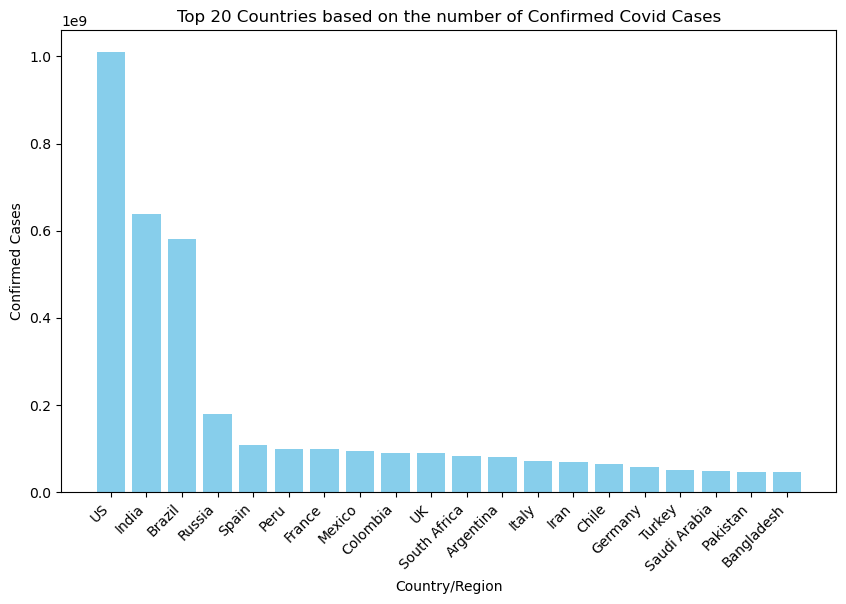

In [65]:
import matplotlib.pyplot as plt

# Sorting the dataset in descending order based on the number of Confirmed cases
covidCases = covidCases.sort_values(by='Confirmed', ascending=False)

# Selecting the top 20 Countries
top_20_countries = covidCases.iloc[:20]

# Creating a bar chart with a different color
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_20_countries['Country/Region'], top_20_countries['Confirmed'], color='skyblue')

# Rotating X-axis labels for better readability
ax.set_xticklabels(top_20_countries['Country/Region'], rotation=45, ha='right')

# Adding title and labels
ax.set_title('Top 20 Countries based on the number of Confirmed Covid Cases')
ax.set_xlabel('Country/Region')
ax.set_ylabel('Confirmed Cases')

# Displaying the plot
plt.show()

Sometimes, we would want to plot the bar chart in a horizontal orientation so that we can easily compare the values, let us do that now. 

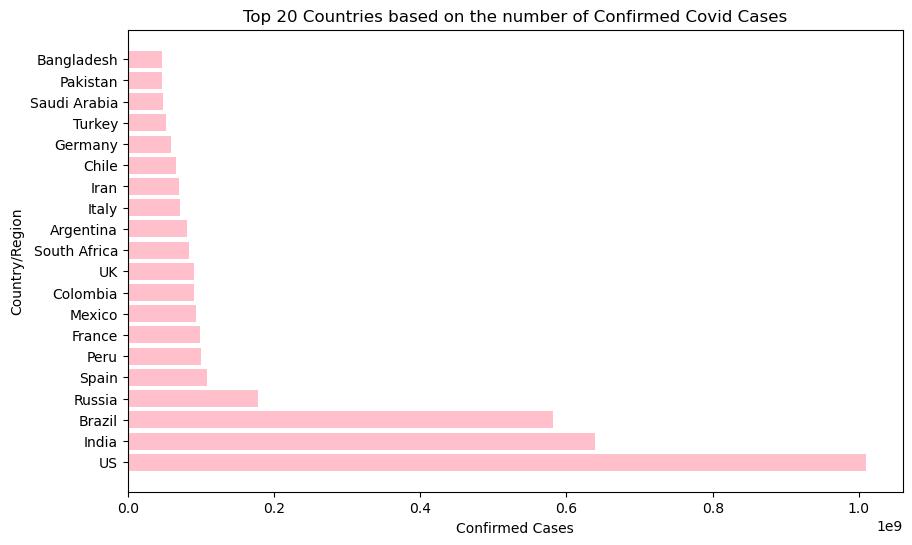

In [58]:
import matplotlib.pyplot as plt

# Sorting the dataset in descending order based on the number of Confirmed cases
covidCases = covidCases.sort_values(by='Confirmed', ascending=False)

# Selecting the top 20 Countries
top_20_countries = covidCases.iloc[:20]

# Creating a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
bars = ax.barh(top_20_countries['Country/Region'], top_20_countries['Confirmed'], color='pink')

# Adding title and labels
ax.set_title('Top 20 Countries based on the number of Confirmed Covid Cases')
ax.set_xlabel('Confirmed Cases')
ax.set_ylabel('Country/Region')

# Displaying the plot
plt.show()

#### We can see that highest number of covid cases are in USA followed by India and Brazil.

# Histograms

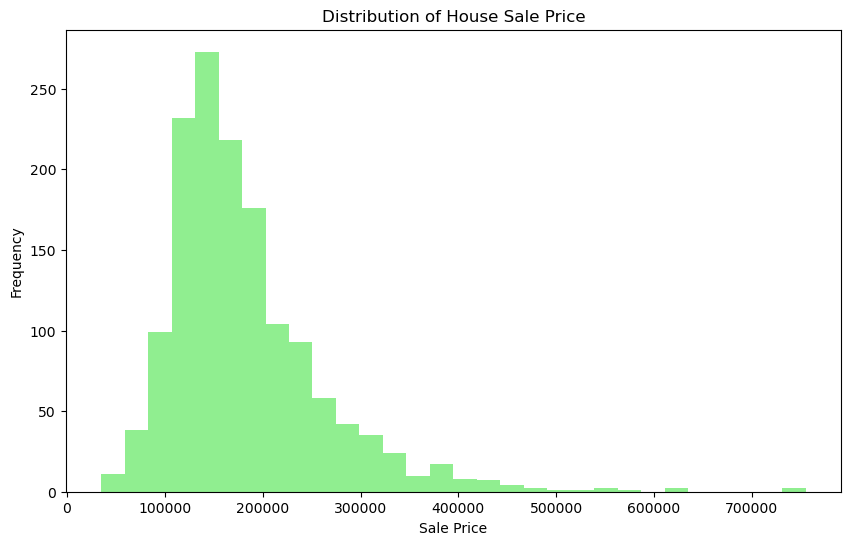

In [63]:
import matplotlib.pyplot as plt

# Assuming 'houses' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(houses['SalePrice'], bins=30, color='lightgreen')

# Adding title and labels
plt.title('Distribution of House Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

#### We can see that houses with price between 140K to 150K are sold more.

Now what if we want to see the distribution on the log scale? 

Simple. Just add one more parameter and we are all set.

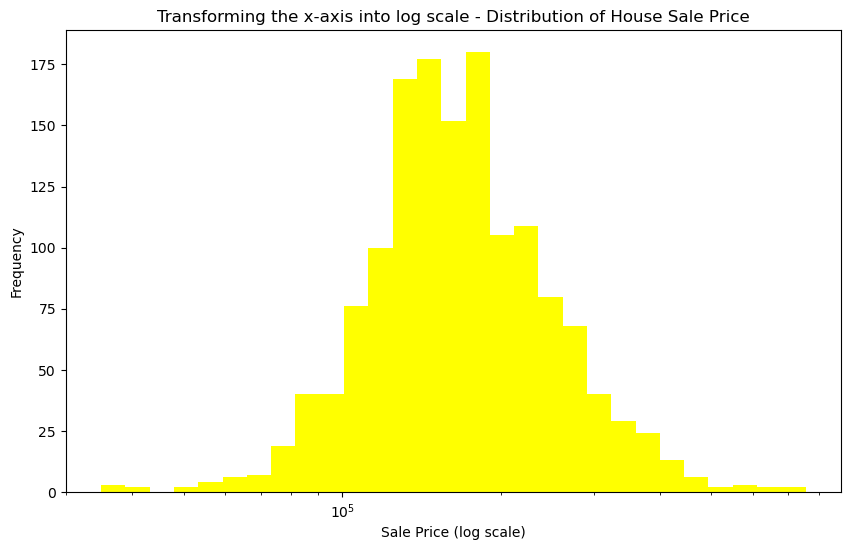

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'houses' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Creating a log-scaled histogram
bins = np.logspace(np.log10(houses['SalePrice'].min()), np.log10(houses['SalePrice'].max()), 30)
plt.hist(houses['SalePrice'], bins=bins, color='yellow')

# Adding title and labels
plt.title('Transforming the x-axis into log scale - Distribution of House Sale Price')
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel('Sale Price (log scale)')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

After converting the above plot into log-scale, we see that it has a more or less normal distribution. 

One more common thing we like to do is change the bin size to see if we are able to get a better understanding of the data. Also, lets plot different histograms for houses sold in different years. 

It may sound like a lot, but is actually fairly simple, just tag along.

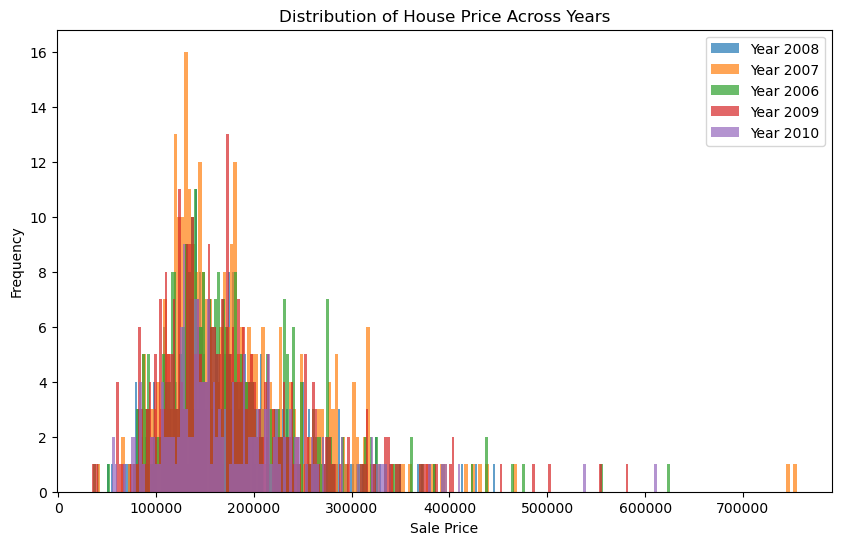

In [54]:
import matplotlib.pyplot as plt

# Assuming 'houses' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Creating a histogram with different colors for each year
for year in houses['YrSold'].unique():
    data = houses[houses['YrSold'] == year]['SalePrice']
    plt.hist(data, bins=200, alpha=0.7, label=f'Year {year}')

# Adding title and labels
plt.title('Distribution of House Price Across Years')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()

# Displaying the plot
plt.show()

#### Now we have a histogram with 200 bins with the distribution in each year of house sold represented in a different colour.


The use of histograms in this project successfully provided a visual and intuitive understanding of distribution patterns within the dataset, contributing to informed decision-making and analysis.